<div class='alert alert-block alert-info'><h2>Financial Crisis in Africa</h2> </div>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/africa-economic-banking-and-systemic-crisis-data/african_crises.csv


In [2]:
df  = pd.read_csv('/kaggle/input/africa-economic-banking-and-systemic-crisis-data/african_crises.csv')
df.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case                             1059 non-null   int64  
 1   cc3                              1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [4]:
df.shape

(1059, 14)

In [5]:
df.isnull().sum()

case                               0
cc3                                0
country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
dtype: int64

In [6]:
df.describe()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1.059000e+03,1059.000000,1059.000000,1059.000000
mean,35.613787,1967.767705,0.077432,43.140831,0.039660,0.152975,0.006402,2.084889e+04,0.776204,0.132200,0.129367
std,23.692402,33.530632,0.267401,111.475380,0.195251,0.360133,0.043572,6.757274e+05,0.416984,0.349847,0.335765
min,1.000000,1860.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.850214e+01,0.000000,0.000000,0.000000
25%,15.000000,1951.000000,0.000000,0.195350,0.000000,0.000000,0.000000,2.086162e+00,1.000000,0.000000,0.000000
50%,38.000000,1973.000000,0.000000,0.868400,0.000000,0.000000,0.000000,5.762330e+00,1.000000,0.000000,0.000000
75%,56.000000,1994.000000,0.000000,8.462750,0.000000,0.000000,0.000000,1.164405e+01,1.000000,0.000000,0.000000
max,70.000000,2014.000000,1.000000,744.306139,1.000000,1.000000,0.400000,2.198970e+07,1.000000,2.000000,1.000000


In [7]:
df.corr()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
case,1.000000,0.115574,0.010991,-0.231976,0.128358,-0.039262,-0.032981,0.044762,0.021858,0.095339,0.006405
year,0.115574,1.000000,0.197450,0.248757,0.136828,0.271890,-0.054670,0.037035,0.407360,0.189390,0.098630
systemic_crisis,0.010991,0.197450,1.000000,0.202687,0.122158,0.249850,0.005274,0.106452,0.147083,0.112751,0.172562
exch_usd,-0.231976,0.248757,0.202687,1.000000,0.005253,0.422890,-0.040726,-0.011947,0.126034,-0.056472,-0.063783
domestic_debt_in_default,0.128358,0.136828,0.122158,0.005253,1.000000,0.464751,-0.029874,0.151832,0.109120,0.227585,0.224429
sovereign_external_debt_default,-0.039262,0.271890,0.249850,0.422890,0.464751,1.000000,0.345919,0.072609,0.228192,0.199428,0.187930
gdp_weighted_default,-0.032981,-0.054670,0.005274,-0.040726,-0.029874,0.345919,1.000000,-0.004535,0.078936,0.016970,0.017630
inflation_annual_cpi,0.044762,0.037035,0.106452,-0.011947,0.151832,0.072609,-0.004535,1.000000,0.016569,0.076590,0.080060
independence,0.021858,0.407360,0.147083,0.126034,0.109120,0.228192,0.078936,0.016569,1.000000,0.086376,-0.022548
currency_crises,0.095339,0.189390,0.112751,-0.056472,0.227585,0.199428,0.016970,0.076590,0.086376,1.000000,0.393376


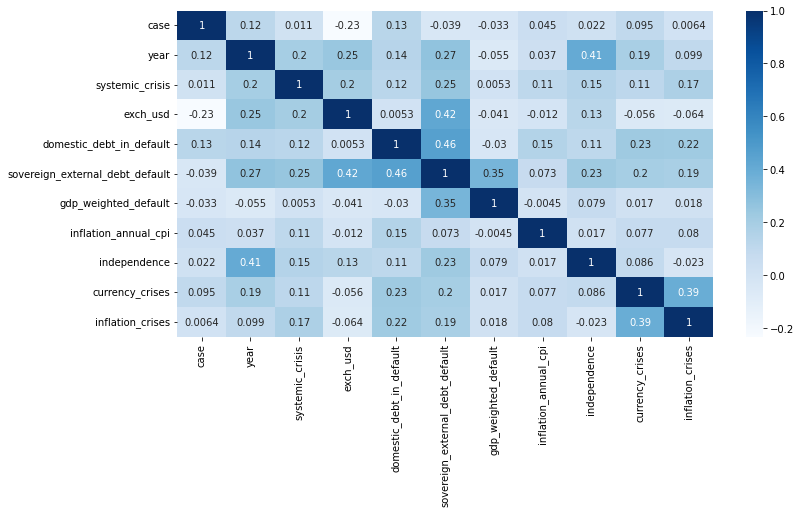

In [8]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

In [9]:
px.histogram(df,x='banking_crisis',color='banking_crisis',color_discrete_map={'crisis':'red','no_crisis':'Blue'},template='plotly_dark')

In [10]:
fig=px.line(df.sort_values(by='year'),x='year',y='inflation_annual_cpi',animation_frame='country',labels={'inflation_annual_cpi':'cpi inflation rate'}, animation_group='year',color='country',markers=True,template='plotly_dark',title='<b> country wise Annual inflation rate over Years')
fig.update_traces(showlegend=False)

In [11]:
fig=px.line(df.sort_values(by='year'),x='year',y='exch_usd',animation_frame='country',labels={'exch_usd':'exchange rate usd'},animation_group='year',color='country',markers=True,template='plotly_dark',title='<b> Country wise Exchange Rate over Years')
fig.update_traces(showlegend=False)

In [12]:
px.bar(df,x='country',y='inflation_annual_cpi',color='inflation_annual_cpi',animation_frame='year',text='inflation_annual_cpi',labels={'inflation_annual_cpi':'cpi inflation rate'},animation_group='country',template='plotly_dark',title='<b> Inflation rate in every countries')

In [13]:
px.choropleth(df.sort_values(by='year'),locations='cc3',animation_frame='year',labels={'exch_usd':'exchange rate usd','cc3':'code','country':'country'},animation_group='country',color='exch_usd',color_continuous_scale=px.colors.sequential.Plasma,title='<b>Exchange Rate of countries in Africa continent',template='plotly_dark')

In [14]:
px.choropleth(df.sort_values(by='year'),locations='cc3',animation_frame='year',labels={'inflation_annual_cpi':'cpi inflation rate','cc3':'code','country':'country'},animation_group='country',color='inflation_annual_cpi',color_continuous_scale=px.colors.sequential.thermal,title='<b>Annual inflation rate of countries in Africa continent',template='plotly_dark')

In [15]:
px.choropleth(df.sort_values(by='year'),locations='cc3',animation_frame='year',labels={'currency_crises':'currency_crises','cc3':'code','country':'country'},animation_group='country',color='currency_crises',title='<b>Currency Crises of countries in Africa continent',color_continuous_scale=px.colors.sequential.Bluered,template='plotly_dark')

In [16]:
px.choropleth(df.sort_values(by='year'),locations='cc3',animation_frame='year',labels={'inflation_crises':'inflation_crises','cc3':'code','country':'country'},animation_group='country',color='inflation_crises',title='<b>Inflation crises of countries in Africa continent',color_continuous_scale=px.colors.sequential.Bluered,template='plotly_dark')

In [17]:
px.choropleth(df.sort_values(by='year'),locations='cc3',animation_frame='year',labels={'inflation_crises':'inflation_crises','cc3':'code','country':'country'},animation_group='country',color='inflation_crises',title='<b>Inflation Crises of countries in Africa continent',color_continuous_scale=px.colors.sequential.Bluered,template='plotly_dark')

In [18]:
df_bk=df.copy()

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])


In [20]:
x=df.drop('banking_crisis',axis=1)
y=df['banking_crisis']

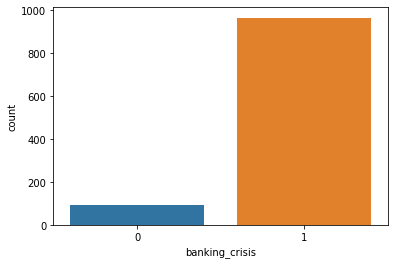

In [21]:
sns.countplot(df['banking_crisis'])
plt.show()

<div class='alert alert-block alert-info'><h2>IF YOU LIKE IT PLEASE DO UPVOTE! <br><br> THANK YOU!</h2></div>